# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [112]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Custom warning format to suppress location information
def custom_warning_format(message, category, *args, **kwargs):
    return f"{category.__name__}: {message}\n"

# Set the custom warning format
warnings.formatwarning = custom_warning_format

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [113]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 0)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [114]:
# Print the dataframe views to get an overview
print('Columns: ',properties.columns)
print('Inspect the index: ',properties.index)
print('Inspect the first few rows: ',properties.head())
print('Inspect the datatypes and valid values: ',properties.info())
print(' Statistics: ',properties.describe())

Columns:  Index(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent',
       'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington & Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster',
       'Unnamed: 34', 'Inner London', 'Outer London', 'Unnamed: 37',
       'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')
Inspect the index:  DatetimeIndex([       'NaT', '1995-01-01', '1995-02-01', '1995-03-01',
               '1995-04-01', '1995-05-01', '1995-06-01', '1995-07-01',
               '1995-08-01', '1995-09-01'

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [115]:
# Set the DF index to 'Time' and remove null timestamps rows
properties=properties.rename_axis(index='Time')
properties=properties.loc[properties.index.isnull()==False,:]
print(properties)

           City of London Barking & Dagenham       Barnet       Bexley  \
Time                                                                     
1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   
1995-03-01    79120.70256        51268.96956  92247.52435  64367.49344   
1995-04-01    77101.20804        53133.50526  90762.87492  64277.66881   
1995-05-01    84409.14932        53042.24852  90258.00033  63997.13588   
...                   ...                ...          ...          ...   
2023-12-01         804808             337725       581371       394474   
2024-01-01         798179             328359       581246       395468   
2024-02-01         785962             319809       573653       395439   
2024-03-01         755712             326650       582371       400146   
2024-04-01         778946             333425       573010       404557   

                  Brent      Bromley 

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [116]:
# Drop columns with all NaNs and check nulls and dtypes for 'properties' to inspect the data quality
properties=properties.dropna(how='all',axis=1)
properties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 1995-01-01 to 2024-04-01
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   City of London        352 non-null    object
 1   Barking & Dagenham    352 non-null    object
 2   Barnet                352 non-null    object
 3   Bexley                352 non-null    object
 4   Brent                 352 non-null    object
 5   Bromley               352 non-null    object
 6   Camden                352 non-null    object
 7   Croydon               352 non-null    object
 8   Ealing                352 non-null    object
 9   Enfield               352 non-null    object
 10  Greenwich             352 non-null    object
 11  Hackney               352 non-null    object
 12  Hammersmith & Fulham  352 non-null    object
 13  Haringey              352 non-null    object
 14  Harrow                352 non-null    object
 15  Havering             

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

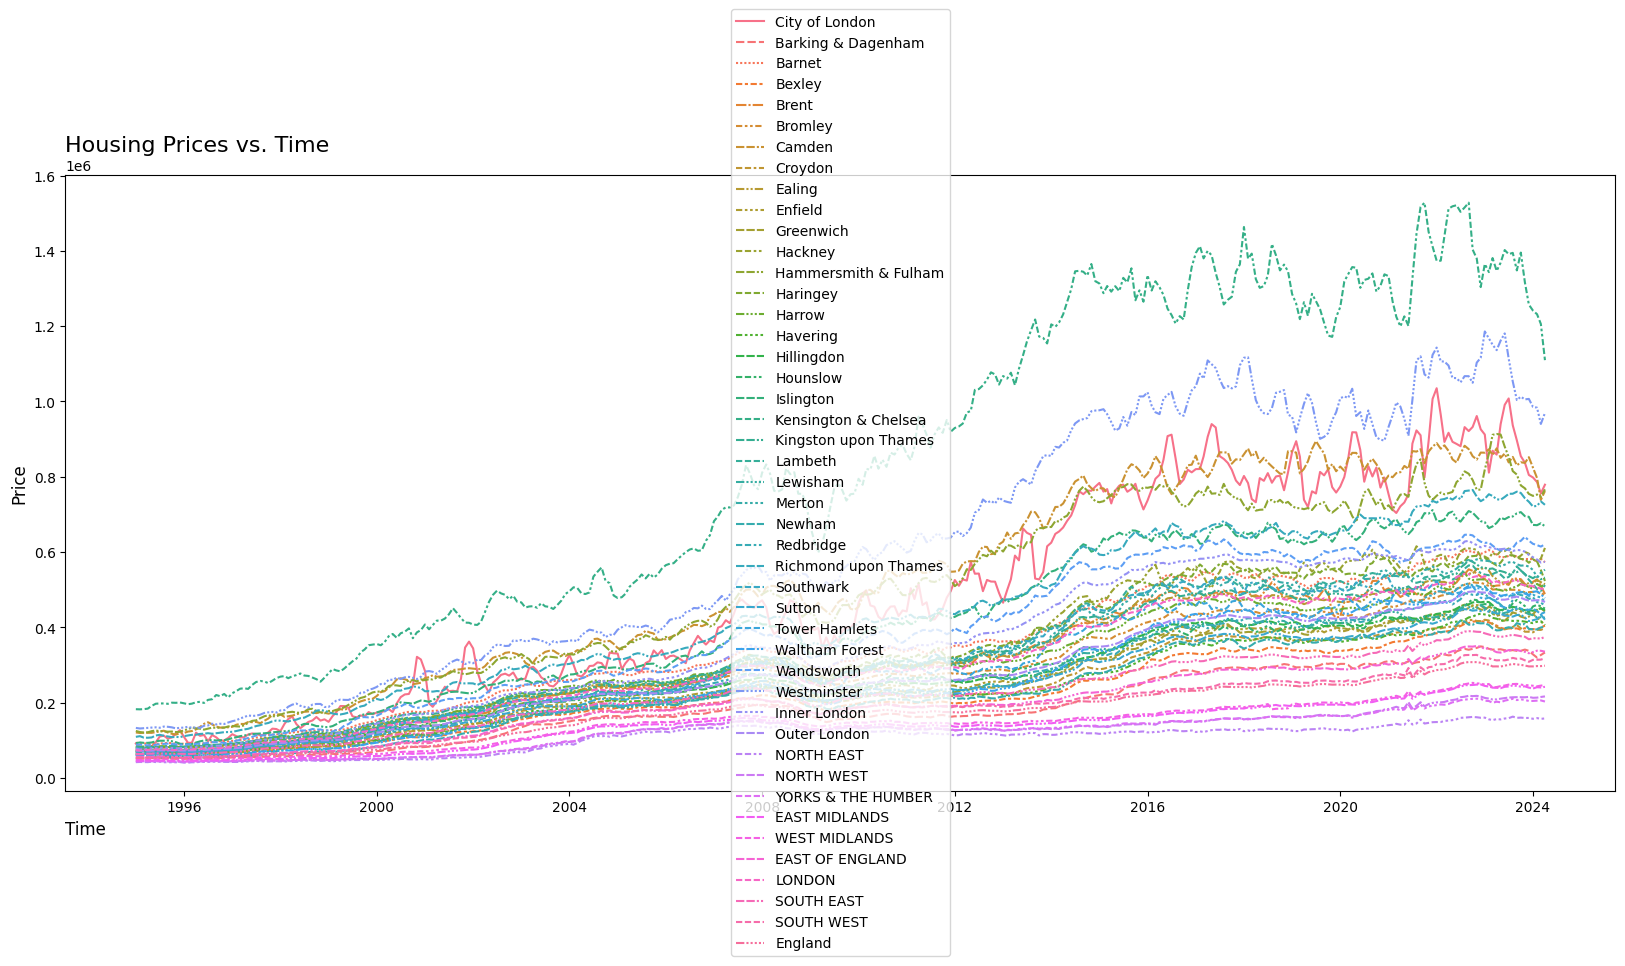

In [117]:
# Plot housing price vs. time
plt.figure(figsize=(20,8))
sns.lineplot(properties)
plt.ylabel('Price',fontsize=12)
plt.xlabel('Time',fontsize=12,loc='left')
plt.legend(loc='center')
plt.title('Housing Prices vs. Time',fontsize=16,loc='left')
plt.show()

<b> Observations: </b>
<p>
<li> House prices have been increasing in value between 1996 and 2016, after which they've remained relatively stable
<li> Increase has been steeper between 2006-2016 than earlier
<li> Kensington & Chelsea had significantly higher housing prices than others, suggesting it is a significantly more desirable place to live in
<li> The City of London prices are a lot more volatile than the other boroughs
<li> The boroughs that are at the lower ends of housing value tend to retain their positions more than some of the boroughs in the middle range whose values may rise above or fall below those of similarly valued boroughs
</p> 

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [118]:
# Functions and Classes
class Gain:
    """
    A class to calculate and analyze gains from an array of values.

    This class processes an input array to compute linear and percentage gains,
    and provides methods for further analysis.

    Attributes:
        array (numpy.ndarray): The processed input array.
        first_val (float): The first value of the processed array.
        linear_gain_array (numpy.ndarray): Array of linear gains.
        percentage_gain_array (numpy.ndarray): Array of percentage gains.
    """

    def __init__(self, array):
        """
        Initialize the Gain object with the given array.

        Args:
            array (array-like): Input array of numerical values.

        The input array is reshaped to 1D, NaN values are removed, and gain arrays are calculated.
        """
        self.array = np.array(array).reshape(-1,)
        self.array = self.array[~np.isnan(self.array)]
        self.first_val = self.array[0]
        self.linear_gain_array = (self.array - self.array[0])
        self.percentage_gain_array = (self.array - self.array[0]) / self.array[0] * 100

    def change(self):
        """
        Return the linear and percentage gain arrays.

        Returns:
            tuple: A tuple containing:
                - numpy.ndarray: Array of linear gains.
                - numpy.ndarray: Array of percentage gains.
        """
        return (self.linear_gain_array, self.percentage_gain_array)

    def get_percent_inverse(self, input_array):
        """
        Calculate the original values from percentage gains.

        Args:
            input_array (array-like): Array of percentage gains.

        Returns:
            numpy.ndarray: Array of original values calculated from the percentage gains.
        """
        return self.first_val * (input_array / 100 + 1)

    def linear_gain(self):
        """
        Perform linear regression on the linear gain array.

        Returns:
            tuple: A tuple containing:
                - float: Rounded slope of the regression line (score).
                - numpy.ndarray: Fitted values from the regression.
        """
        result = linregress(np.arange(self.array.shape[0]) - 1, self.linear_gain_array)
        slope = result.slope
        intercept = result.intercept
        values = np.arange(self.array.shape[0]) * slope + intercept
        score = np.round(slope, 2)
        return (score, values)

    def percentage_gain(self):
        """
        Perform linear regression on the percentage gain array.

        Returns:
            tuple: A tuple containing:
                - float: Rounded slope of the regression line (score).
                - numpy.ndarray: Fitted values from the regression.
        """
        result = linregress(np.arange(self.array.shape[0]) - 1, self.percentage_gain_array)
        slope = result.slope
        intercept = result.intercept
        values = np.arange(0, self.array.shape[0]) * slope + intercept
        score = np.round(slope, 2)
        return (score, values)

<b> Q: Which boroughs have shown the highest increase in value? </b>

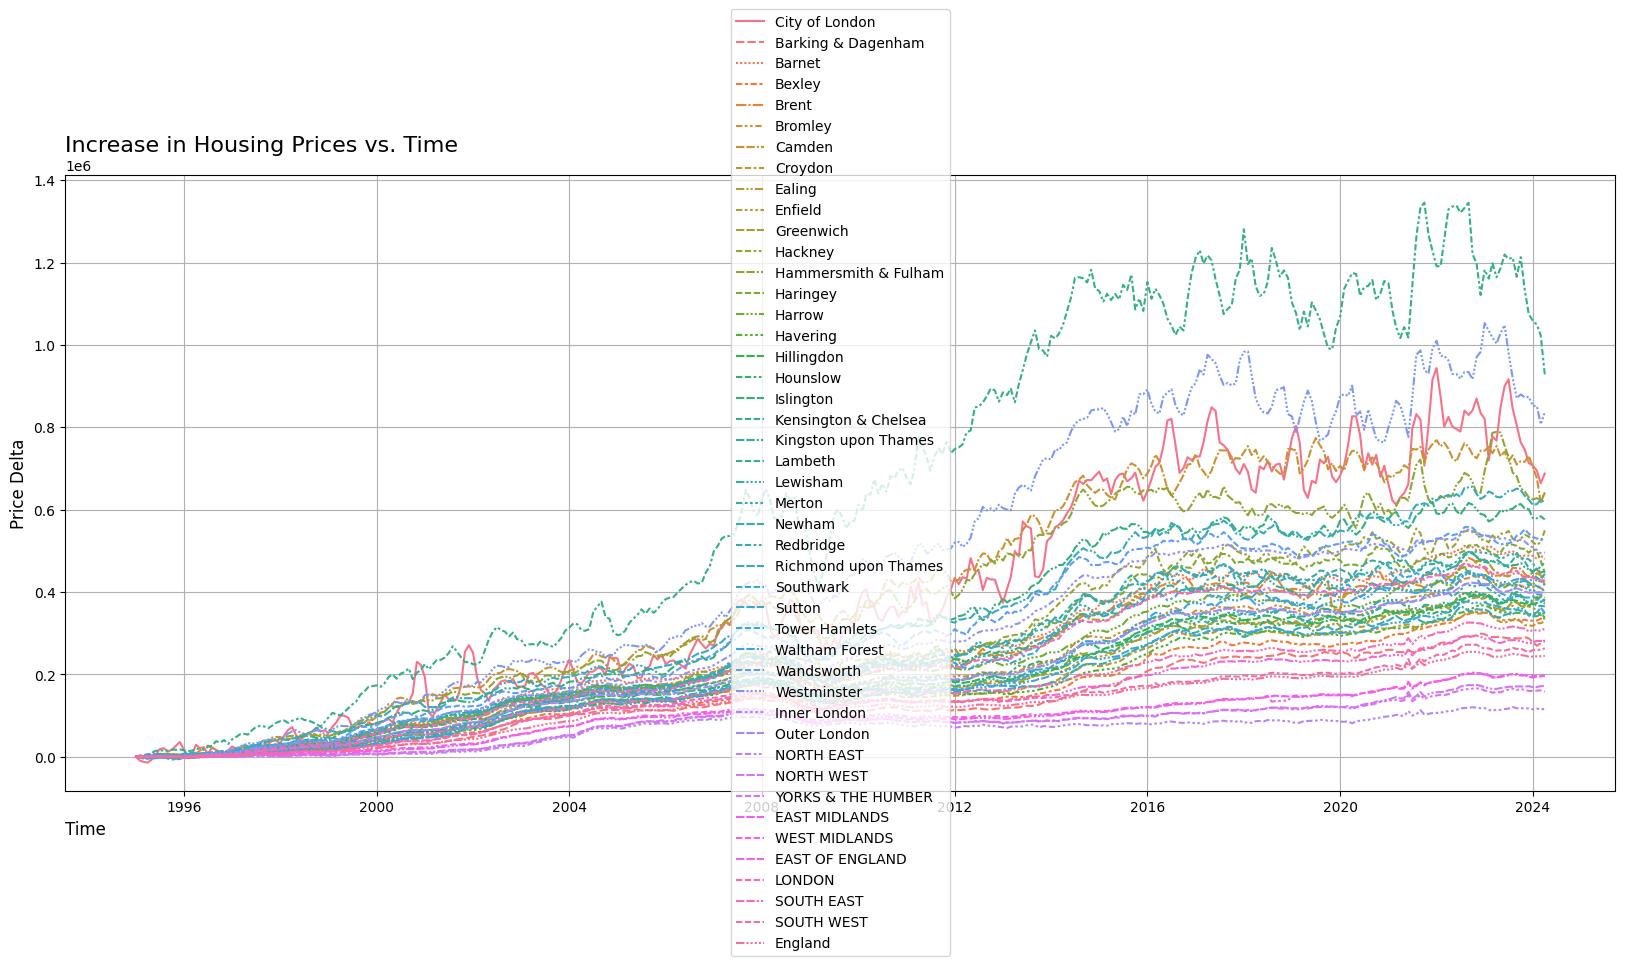

In [119]:
# Plot the Increase in housing price (price-price[0]) over time
plt.figure(figsize=(20,8))
sns.lineplot(properties.apply(lambda x:Gain(x.astype('float')).change()[0]))
plt.ylabel('Price Delta',fontsize=12)
plt.xlabel('Time',fontsize=12,loc='left')
plt.title('Increase in Housing Prices vs. Time',fontsize=16,loc='left')
plt.grid(visible=True)
plt.legend(loc='center')
plt.show()

<b> Observations: </b>
<p>
<li> Kensington & Chelsea still significantly leads the other boroughs in how its value has increased over time
</p> 

<b> Q: How steep on average has the change in value been? </b>

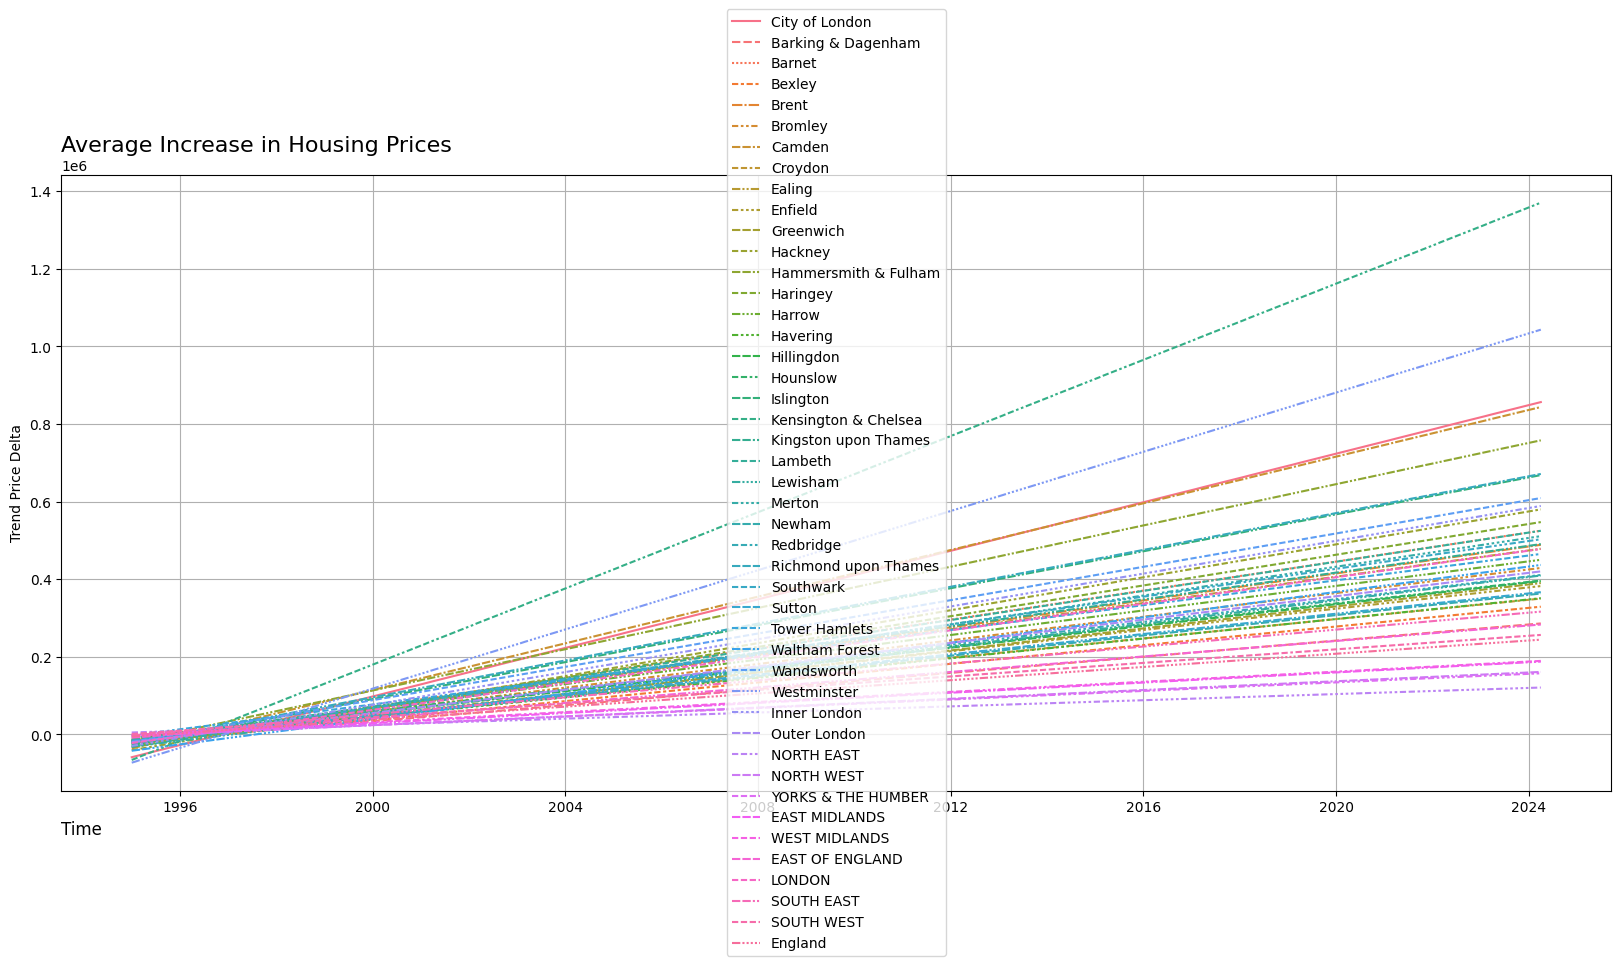

In [120]:
# Slope of increase in housing prices over time
properties_avg_increase=properties.apply(lambda x:Gain(x.astype('float')).linear_gain()[1])
plt.figure(figsize=(20,8))
sns.lineplot(properties_avg_increase)
plt.ylabel('Trend Price Delta',fontsize=10)
plt.title('Average Increase in Housing Prices',fontsize=16,loc='left')
plt.xlabel('Time',fontsize=12,loc='left')
plt.grid(visible=True)
plt.legend(loc='center')
plt.show()

<b> Observations: </b>
<p>
<li> As expected from the earlier exploration, Kensington and Chelsea has the steepest average increase in price
<li> Westminister trails behind by a significant margin, followed by the others
<li> A lack of converging lines indicates that the rank of borough values are expected to hold for some time, with a greater chance of change between a few boroughs towards the middle range
</p>

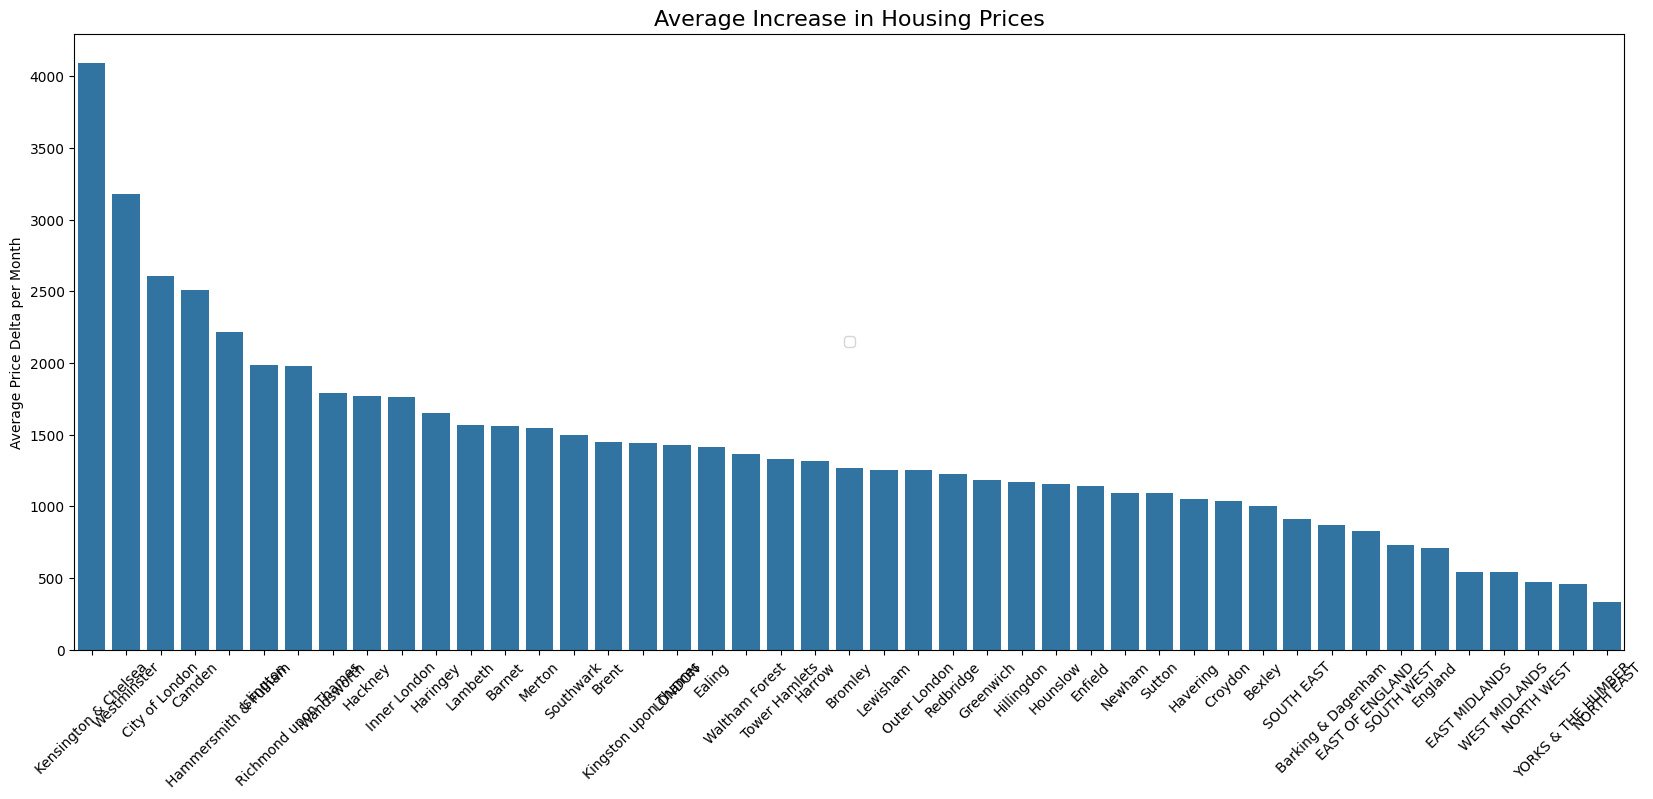

In [121]:
# Slope of Increase in price over time
properties_avg_increase_sorted=properties.apply(lambda x:Gain(x.astype('float')).linear_gain()[0]).sort_values(ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(properties_avg_increase_sorted)
plt.ylabel('Average Price Delta per Month',fontsize=10)
plt.title('Average Increase in Housing Prices',fontsize=16)
plt.xticks(rotation=45)
plt.legend(loc='center')
plt.show()

In [122]:
properties_avg_increase_sorted.T

Kensington & Chelsea    4092.69
Westminster             3179.92
City of London          2607.99
Camden                  2506.99
Hammersmith & Fulham    2216.23
Islington               1984.10
Richmond upon Thames    1978.48
Wandsworth              1790.79
Hackney                 1768.58
Inner London            1762.23
Haringey                1650.30
Lambeth                 1565.39
Barnet                  1558.89
Merton                  1546.56
Southwark               1494.95
Brent                   1446.77
Kingston upon Thames    1440.25
LONDON                  1425.27
Ealing                  1412.11
Waltham Forest          1364.55
Tower Hamlets           1333.43
Harrow                  1318.64
Bromley                 1269.85
Lewisham                1257.01
Outer London            1255.08
Redbridge               1222.86
Greenwich               1181.26
Hillingdon              1168.16
Hounslow                1155.45
Enfield                 1143.81
Newham                  1090.76
Sutton  

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

<p>
<font size="3">
<ol>
<b>
<li> Kenningston and Chelsea and Westminister lead the boroughs in being lucrative, being significantly higher than the other boroughs in both current value and increase of average housing prices
</b>
</ol>
</font>
</p>